R² (Anpassungsgüte) = 0.9935495873056509

f(x) =  22.9639 * e^(- 0.01174 * x) + -0.9925 
(gerundet)

τ (Tau) = 4260.745385349409 µs (Wie lange dauert es, bis 1/e des ursprünglichen Wertes abgefallen ist?)


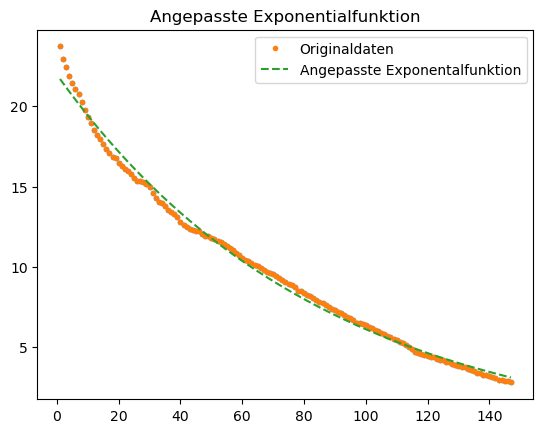

In [91]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# Werte vom Abkühlen des Arduinos (v3)
# Zeit t
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147])
# Temperatur T
y = np.array([23.73,22.95,22.42,21.89,21.45,21.1,20.76,20.25,19.77,19.34,18.96,18.55,18.24,17.97,17.66,17.36,17.1,16.87,16.78,16.48,16.26,16.1,15.97,15.76,15.53,15.37,15.33,15.3,15.18,14.95,14.58,14.26,14.05,13.98,13.78,13.57,13.39,13.29,13.08,12.82,12.62,12.46,12.33,12.32,12.26,12.2,12.02,11.92,11.9,11.82,11.71,11.63,11.57,11.41,11.28,11.15,11.02,10.84,10.71,10.54,10.42,10.35,10.24,10.11,10.02,9.94,9.79,9.69,9.6,9.52,9.41,9.31,9.18,9.03,8.92,8.84,8.71,8.5,8.48,8.37,8.27,8.18,8.05,7.93,7.82,7.72,7.61,7.51,7.4,7.29,7.17,7.09,7,6.89,6.82,6.7,6.51,6.47,6.46,6.36,6.26,6.16,6.05,5.97,5.87,5.81,5.71,5.61,5.5,5.42,5.34,5.24,5.1,4.97,4.86,4.71,4.62,4.59,4.52,4.47,4.39,4.35,4.28,4.21,4.18,4.09,4.04,3.97,3.91,3.83,3.76,3.75,3.61,3.56,3.48,3.4,3.35,3.26,3.26,3.22,3.15,3.06,2.97,2.93,2.9,2.86,2.79])


plt.plot(x, y, '.')
plt.title("T(t)-Diagramm")

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, x, y, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(y - monoExp(x, m, t, b))
squaredDiffsFromMean = np.square(y - np.mean(y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² (Anpassungsgüte) = {rSquared}") # gibt an, wie gut die angepasste Kurve die Daten darstellt (perfekt: 1, grauenvoll: 0)

# plot the results
plt.plot(x, y, '.', label="Originaldaten")
plt.plot(x, monoExp(x, m, t, b), '--', label="Angepasste Exponentalfunktion")
plt.title("Angepasste Exponentialfunktion")
plt.legend()

# inspect the parameters
print(f"\nf(x) = {m: .6} * e^(-{t: .4} * x) + {b: .4} \n(gerundet)\n")
print(f"τ (Tau) = {tauSec * 1e6} µs (Wie lange dauert es, bis 1/e des ursprünglichen Wertes abgefallen ist?)")